In [78]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [79]:
# load pop
df = gpd.read_file('../../public/data/mapMain/jaipur_eai.geojson')
df = df[['hex_id','geometry','pop_sum']]
df.head()

,hex_id,geometry,pop_sum
0,23,"POLYGON ((75.6882 26.92514, 75.68966 26.92739,...",101
1,24,"POLYGON ((75.68817 26.92063, 75.68964 26.92288...",344
2,25,"POLYGON ((75.68814 26.91612, 75.68961 26.91837...",46
3,26,"POLYGON ((75.68811 26.9116, 75.68958 26.91385,...",99
4,27,"POLYGON ((75.68809 26.90709, 75.68955 26.90934...",128


In [80]:
# load ward
df_ward = gpd.read_file('../../public/data/mapMain/jaipur_wards.geojson')
df_ward.head()

,ward_id,jmc,jmc_name,ward_no,assembly,color_assembly,pop,dens_pph,geometry
0,G-1,150,Greater,1,VIDHYADHAR NAGAR,#abd0ac,11930,24,"POLYGON ((75.74601 27.00898, 75.73282 27.02027..."
1,G-2,150,Greater,2,VIDHYADHAR NAGAR,#abd0ac,11096,23,"POLYGON ((75.74601 27.00898, 75.75914 27.00912..."
2,G-3,150,Greater,3,VIDHYADHAR NAGAR,#abd0ac,12110,81,"POLYGON ((75.75914 27.00912, 75.76543 27.0173,..."
3,G-4,150,Greater,4,VIDHYADHAR NAGAR,#abd0ac,12097,78,"POLYGON ((75.77059 26.99986, 75.77021 27.00214..."
4,G-5,150,Greater,5,VIDHYADHAR NAGAR,#abd0ac,12158,27,"POLYGON ((75.77957 27.00536, 75.77965 27.00599..."


In [81]:
#load bus and metro stops
bus_stops = gpd.read_file('../../public/data/mapMain/bus_stops.geojson')
bus_routes = gpd.read_file('../../public/data/mapMain/bus_routes.geojson')
metro_stations = gpd.read_file('../../public/data/mapMain/metro_stations.geojson')

Skipping field interval: unsupported OGR type: 10


In [82]:
# Projected crs
bus_stops.to_crs('EPSG:7774', inplace=True)
bus_routes.to_crs('EPSG:7774', inplace=True)
metro_stations.to_crs('EPSG:7774', inplace=True)
df.to_crs('EPSG:7774', inplace=True)
df_ward.to_crs('EPSG:7774', inplace=True)

In [83]:
dict_route_interval = {
'1' : 26,
'1 Mini/1' : 30,
'1A' : 50,
'3' : 13,
'3A' : 9,
'6A' : 48,
'7' : 12,
'9A' : 12,
'10B' : 30,
'11' : 45,
'14' : 20,
'15' : 30,
'16' : 20,
'23A' : 120,
'24' : 30,
'25A' : 180,
'25B' : 180,
'26' : 23,
'27' : 60,
'28' : 22,
'30' : 35,
'32' : 44,
'34' : 30,
'AC 1' : 24,
'AC 2' : 15,
'AC 7' : 22,
'AC 8' : 28,
'RBP-2' : 10,
}
bus_routes['interval_min'] = bus_routes['route'].map(dict_route_interval)
bus_routes

,route,operator,from,to,color,interval_min,geometry
0,1,JCTSL,Bheru Khejda,Galta,#1f77b4,26.0,"MULTILINESTRING ((1189610.869 1018998.37, 1189..."
1,1 Mini/1,JCTSL,Galta Gate,Todi,#aec7e8,30.0,"MULTILINESTRING ((1187928.468 1013969.587, 118..."
2,11,JCTSL,Goner,Ajmeri Gate,#ff7f0e,45.0,"MULTILINESTRING ((1201059.278 989557.819, 1201..."
3,14,JCTSL,Chomu pulia,Bassi,#ffbb78,20.0,"MULTILINESTRING ((1188305.898 1007506.907, 118..."
4,1A,JCTSL,V.K.I.,Transport Nagar,#2ca02c,50.0,"MULTILINESTRING ((1190405.112 1013929.832, 119..."
5,26,JCTSL,Bagru,Chandpole,#98df8a,23.0,"MULTILINESTRING ((1165727.134 994165.692, 1165..."
6,3,JCTSL,Sanganer Bus Depot,Transport Nagar,#d62728,13.0,"MULTILINESTRING ((1195147.745 992196.228, 1195..."
7,34,JCTSL,Anand Manglam City,JDA Colony,#ff9896,30.0,"MULTILINESTRING ((1187757.249 993599.959, 1187..."
8,3A,JCTSL,Sanganer,Choti Chaupar,#9467bd,9.0,"MULTILINESTRING ((1189599.888 993749.295, 1189..."
9,3B,JCTSL,Pannadhaya Circle,Kunda,#c5b0d5,NaN,"MULTILINESTRING ((1193361.259 992841.871, 1193..."


In [84]:
# Extract routes for stops
bus_buffer50 = bus_stops.copy()
bus_buffer50['geometry'] = bus_stops['geometry'].buffer(50)

# get intersected routes and min interval for each  stop
joint = gpd.sjoin(bus_buffer50,
                  bus_routes[['route','geometry']], how='left', predicate='intersects')
joint['interval_min'] = joint['route'].map(dict_route_interval) # map interval
joint_grouped = joint.groupby('osm_id').agg({
    'interval_min': 'min', 
    'route': lambda x: ', '.join(x.dropna().unique())
}).reset_index() # group by stop, get min interval and all routes in list

# merge back to bus_stops
bus_stops = bus_stops.merge(joint_grouped, on='osm_id', how='left')
bus_stops.head()

# filter out stops with interval >20 mins
bus_stops_filtered = bus_stops[bus_stops['interval_min'] <= 20]
bus_stops_filtered  


,osm_id,name,barrier,highway,ref,address,is_in,place,man_made,other_tags,geometry,interval_min,route
0,315733720,Ghat ki guni,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""bus_routes""=>""27"",""public_transp...",POINT (1197118.274 1002623.545),20.0,14
3,316742605,Kalyan Nagar,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""public_transport""=>""platform""",POINT (1190591.28 994938.152),9.0,"11, 3C, 3, 3B, AC 1, AC 2, 3A"
4,316742974,Maharani College,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""public_transport""=>""platform""",POINT (1192614.527 1004495.176),9.0,"11, 3C, 3, 34, AC 7, 14, 3B, AC 1, AC 2, 3A, 6..."
5,316799662,Gujar Ki thadi,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""bus_routes""=>""7, 32, 23, AC 5"",""...",POINT (1187806.956 1000913.608),12.0,7
6,316943439,Choti Chaupar,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""public_transport""=>""platform""",POINT (1192843.827 1005839.486),9.0,"1 Mini/1, 3A, 1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,8137399293,Dayal Hospital,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""public_transport""=>""platform""",POINT (1197715.896 1002413.691),20.0,14
373,8568606142,DCM,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""public_transport""=>""platform""",POINT (1186987.768 1002883.464),20.0,"14, 26"
374,8643260432,Chandpole Metro Station,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""public_transport""=>""platform""",POINT (1191764.387 1005970.285),12.0,"1 Mini/1, 26, 9A, 1A"
375,10749905306,None,None,bus_stop,None,None,None,None,None,"""bus""=>""yes"",""public_transport""=>""platform""",POINT (1190414.217 1005327.885),15.0,"AC 7, AC 2, 6A, AC 8"


<Axes: >

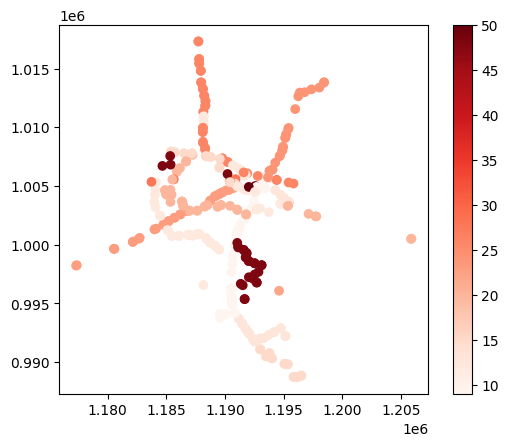

In [86]:
bus_stops.plot(column='interval_min', cmap='Reds', legend=True)

In [93]:
# Buffer 500m around bus stops and metro stations
bus_buffer = bus_stops_filtered.buffer(500)
metro_buffer = metro_stations.buffer(500)

In [94]:
# create a column is_accessible, True if within 500m of bus or metro station
all_transit_geometries = pd.concat(
    [bus_buffer.geometry, metro_buffer.geometry])
accessible_area = all_transit_geometries.union_all()

df['is_accessible'] = df['geometry'].intersects(accessible_area)
df.head()

,hex_id,geometry,pop_sum,is_accessible
0,23,"POLYGON ((1179899.526 1005724.617, 1180041.545...",101,False
1,24,"POLYGON ((1179903.959 1005224.971, 1180045.977...",344,False
2,25,"POLYGON ((1179908.392 1004725.325, 1180050.411...",46,False
3,26,"POLYGON ((1179912.825 1004225.679, 1180054.844...",99,False
4,27,"POLYGON ((1179917.26 1003726.033, 1180059.278 ...",128,False


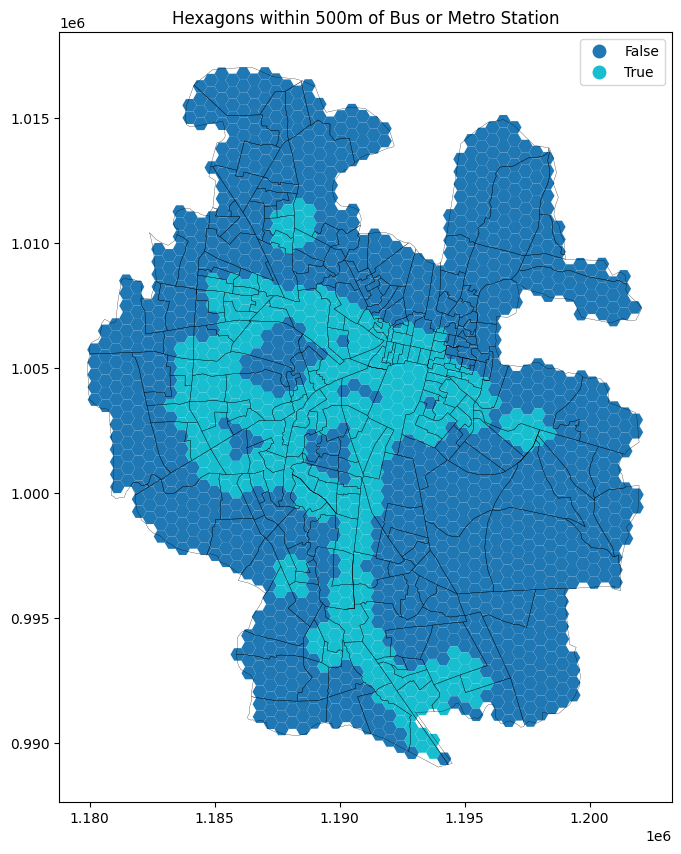

In [95]:
# map hex true
fig,ax = plt.subplots(1,1,figsize=(10,10))
df.plot(column='is_accessible', ax=ax, legend=True)
df_ward.boundary.plot(ax=ax, color='black', linewidth=0.2)
ax.set_title('Hexagons within 500m of Bus or Metro Station')
plt.show()

In [96]:
# intersect ward with hex, sum pop where is_accessible is True
ward_accessible_pop = gpd.sjoin(df[df['is_accessible'] == True], df_ward, how='inner', predicate='intersects')
ward_accessible_pop = ward_accessible_pop.groupby('ward_id')['pop_sum'].sum().reset_index()
ward_accessible_pop.columns = ['ward_id', 'accessible_pop_sum']

ward_total_pop = gpd.sjoin(df, df_ward, how='inner', predicate='intersects')
ward_total_pop = ward_total_pop.groupby('ward_id')['pop_sum'].sum().reset_index()
ward_total_pop.columns = ['ward_id', 'pop_sum']

df_ward = df_ward.merge(ward_accessible_pop[['ward_id', 'accessible_pop_sum']], on='ward_id', how='left')
df_ward = df_ward.merge(ward_total_pop[['ward_id', 'pop_sum']], on='ward_id', how='left')
df_ward['pct_accessible'] = round(df_ward['accessible_pop_sum'] / df_ward['pop_sum'] * 100,2)

# fillna for accessible_pop_sum and pct_accessible with 
df_ward['accessible_pop_sum'] = df_ward['accessible_pop_sum'].fillna(0)
df_ward['pct_accessible'] = df_ward['pct_accessible'].fillna(0)
df_ward.head()

,ward_id,jmc,jmc_name,ward_no,assembly,color_assembly,pop,dens_pph,geometry,accessible_pop_sum,pop_sum,pct_accessible
0,G-1,150,Greater,1,VIDHYADHAR NAGAR,#abd0ac,11930,24,"POLYGON ((1185498.275 1015087.032, 1184172.14 ...",0.0,13435,0.0
1,G-2,150,Greater,2,VIDHYADHAR NAGAR,#abd0ac,11096,23,"POLYGON ((1185498.275 1015087.032, 1186799.107...",0.0,22425,0.0
2,G-3,150,Greater,3,VIDHYADHAR NAGAR,#abd0ac,12110,81,"POLYGON ((1186799.107 1015121.483, 1187409.09 ...",0.0,22935,0.0
3,G-4,150,Greater,4,VIDHYADHAR NAGAR,#abd0ac,12097,78,"POLYGON ((1187950.177 1014113.442, 1187908.65 ...",0.0,19409,0.0
4,G-5,150,Greater,5,VIDHYADHAR NAGAR,#abd0ac,12158,27,"POLYGON ((1188830.781 1014735.383, 1188837.696...",0.0,15888,0.0


In [97]:
df_ward['accessible_pop_sum'].sum(), df_ward['pop_sum'].sum(), df_ward['accessible_pop_sum'].sum() / df_ward['pop_sum'].sum() * 100

(np.float64(3956151.0), np.int64(8792918), np.float64(44.992470076486555))

In [98]:
df_ward.shape

(251, 12)

In [99]:
#save as A02.geojson
df_ward.to_crs('EPSG:4326', inplace=True)
df_ward.to_file('../../public/data/kpiMaps/A02.geojson', driver='GeoJSON')

In [100]:
df_ward.isna().sum()

ward_id               0
jmc                   0
jmc_name              0
ward_no               0
assembly              0
color_assembly        0
pop                   0
dens_pph              0
geometry              0
accessible_pop_sum    0
pop_sum               0
pct_accessible        0
dtype: int64